In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from bioinfokit.visuz import cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

In [2]:
dataset = pd.read_csv("Dataset 2/ev-charging-stations-india.csv")

# Comparing Dataset 1 --> Ev Charging station

In [3]:
dataset.shape

(1547, 7)

In [4]:
dataset.head()

,name,state,city,address,lattitude,longitude,type
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.9803,12.0
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.0818,12.0
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.2760,12.0
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.7218,12.0
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.3105,77.7218,12.0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1547 non-null   object 
 1   state      1547 non-null   object 
 2   city       1547 non-null   object 
 3   address    1507 non-null   object 
 4   lattitude  1541 non-null   object 
 5   longitude  1541 non-null   float64
 6   type       1539 non-null   float64
dtypes: float64(2), object(5)
memory usage: 84.7+ KB


In [6]:
dataset.isnull().sum()

name          0
state         0
city          0
address      40
lattitude     6
longitude     6
type          8
dtype: int64

In [7]:
dataset = dataset.drop(columns=["address"])

In [8]:
dataset.dropna(axis=0, inplace=True)


In [9]:
dataset.isnull().sum()


name         0
state        0
city         0
lattitude    0
longitude    0
type         0
dtype: int64

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1533 entries, 0 to 1546
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1533 non-null   object 
 1   state      1533 non-null   object 
 2   city       1533 non-null   object 
 3   lattitude  1533 non-null   object 
 4   longitude  1533 non-null   float64
 5   type       1533 non-null   float64
dtypes: float64(2), object(4)
memory usage: 83.8+ KB


In [11]:
entries_by_region= dataset['state'].value_counts()


No of Station in each State

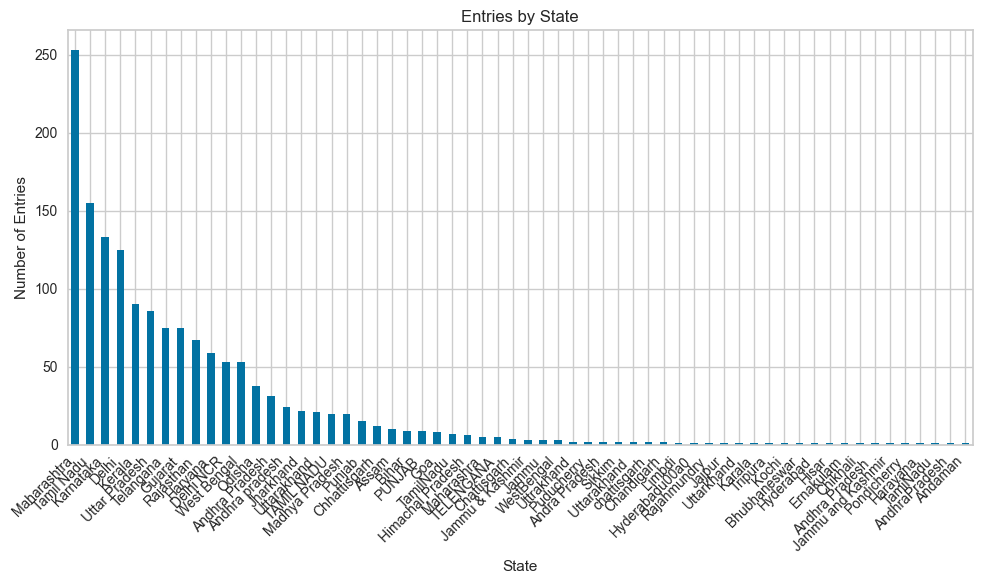

In [12]:
plt.figure(figsize=(10, 6))
entries_by_region.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Number of Entries')
plt.title('Entries by State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [13]:
entries_by_type= dataset['type'].value_counts()


 Comparing Type

(-1.099999806153614,
 1.099995938203087,
 -1.0999927268955085,
 1.0999996536330539)

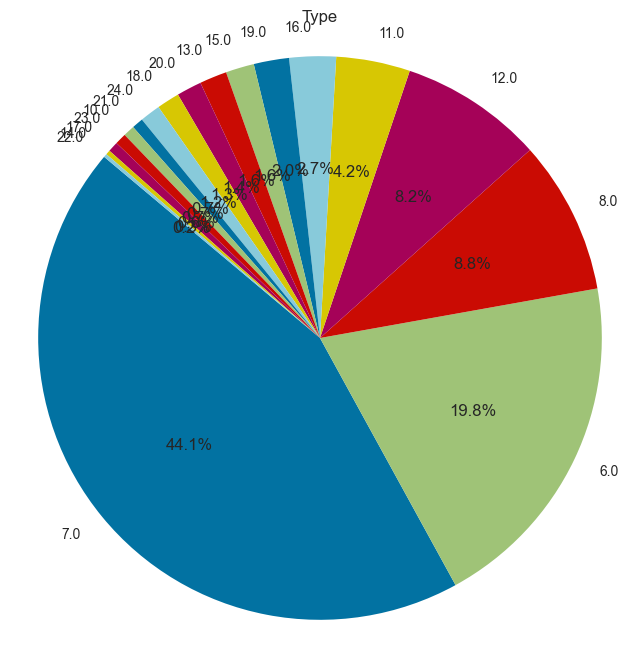

In [16]:
plt.figure(figsize=(8, 8))
plt.pie(entries_by_type, labels=entries_by_type.index, autopct='%1.1f%%', startangle=140)
plt.title('Type')
plt.axis('equal')

In [17]:
state_type_counts = dataset.groupby(['state', 'type']).size().reset_index(name='count')
state_type_pivot = state_type_counts.pivot(index='state', columns='type', values='count').fillna(0)


Ploting No Of types in Each State

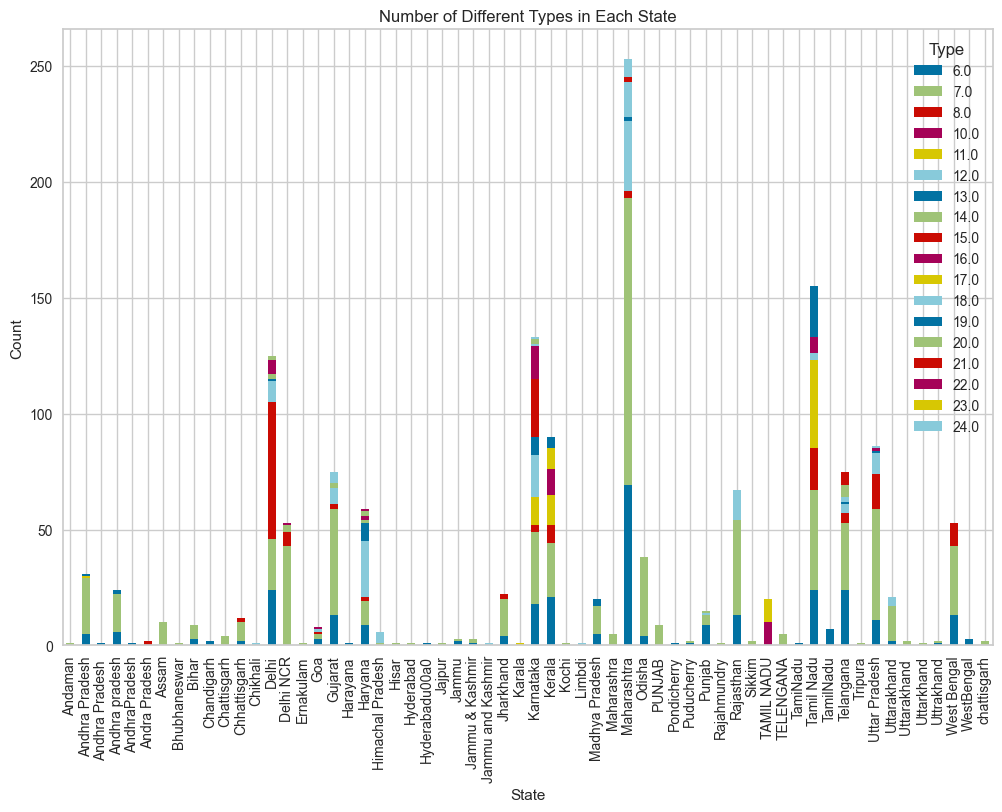

In [18]:
state_type_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Number of Different Types in Each State')
plt.legend(title='Type', loc='upper right')
plt.show()


# Dataset 2 --> No Of Evs in each state

In [86]:
data = pd.read_csv('Dataset 2/RS_Session_256_AU_95_C.csv')
data

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total
0,Andaman and Nicobar Island,1,30.0,81,NaN,40.0,NaN,NaN,NaN,7.0,159
1,Arunachal Pradesh,14,NaN,5,NaN,NaN,NaN,NaN,NaN,1.0,20
2,Assam,721,47041.0,161,7.0,15.0,NaN,NaN,NaN,2.0,47947
3,Bihar,5003,59079.0,114,11.0,26.0,NaN,NaN,NaN,8.0,64241
4,Chandigarh,298,1410.0,182,NaN,40.0,NaN,NaN,NaN,1.0,1931
5,Chhattisgarh,6424,5341.0,117,1077.0,1.0,NaN,NaN,368.0,100.0,13428
6,Delhi,14730,112831.0,3051,49.0,39.0,NaN,NaN,NaN,1602.0,132302
7,Goa,1314,28.0,289,13.0,36.0,2.0,NaN,NaN,4.0,1686
8,Gujarat,13662,1869.0,1309,28.0,278.0,344.0,NaN,26.0,77.0,17593
9,Haryana,7777,18595.0,186,122.0,8.0,2.0,NaN,NaN,90.0,26780


In [90]:
data = data.drop(columns=["Ambulance/Hearses", "Construction Equipment Vehicle","Special Category Vehicles","Public Service Vehicle"])
data = data[data['State Name'] != 'Grand Total']


In [91]:
data.isnull().sum() / data.shape[0] * 100.00

State Name         0.0
Two Wheeler        0.0
Three Wheeler     12.5
Four Wheeler       0.0
Goods Vehicles    12.5
Other             12.5
Grand Total        0.0
dtype: float64

In [93]:
data["Three Wheeler"].fillna(data["Two Wheeler"] * 2.3, inplace=True)
data["Goods Vehicles"].fillna(data["Two Wheeler"] * 0.01, inplace=True)
data["Other"].fillna(data["Two Wheeler"] * 0.017, inplace=True)



In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State Name      32 non-null     object 
 1   Two Wheeler     32 non-null     int64  
 2   Three Wheeler   32 non-null     float64
 3   Four Wheeler    32 non-null     int64  
 4   Goods Vehicles  32 non-null     float64
 5   Other           32 non-null     float64
 6   Grand Total     32 non-null     int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 2.0+ KB


Comparing Data

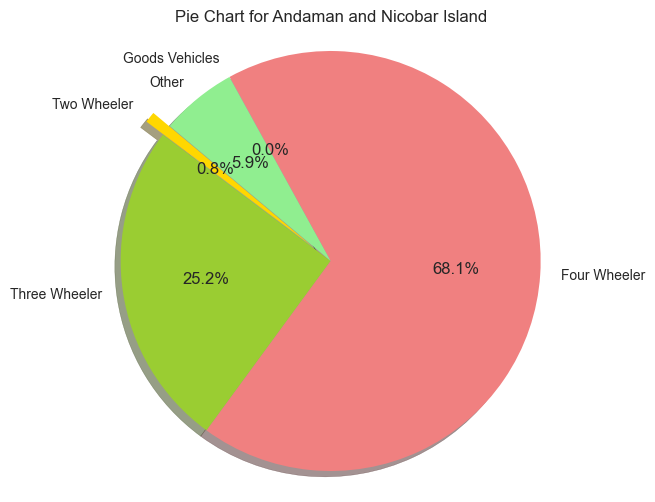

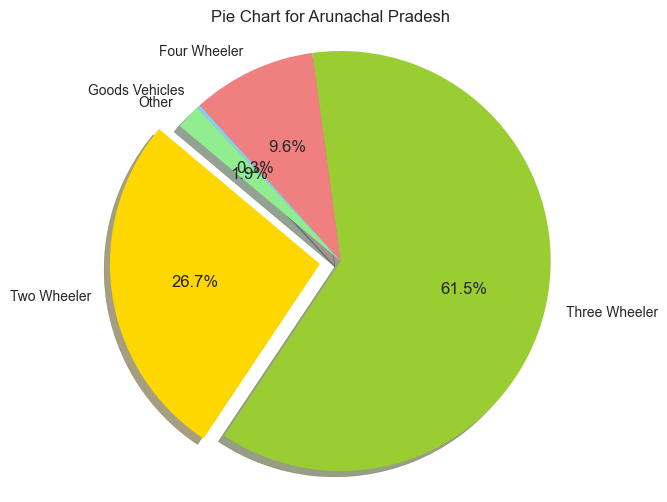

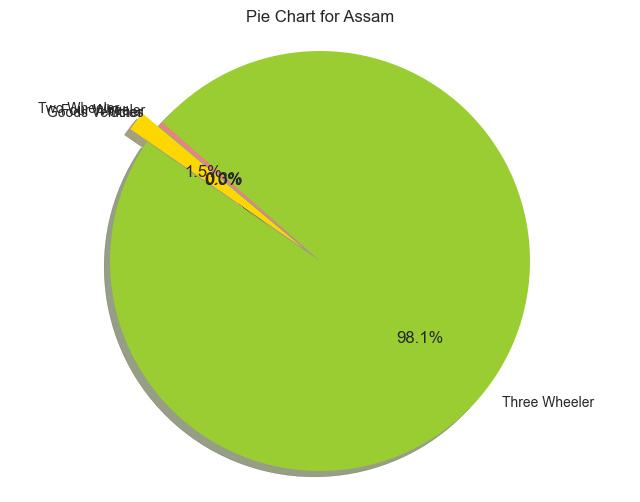

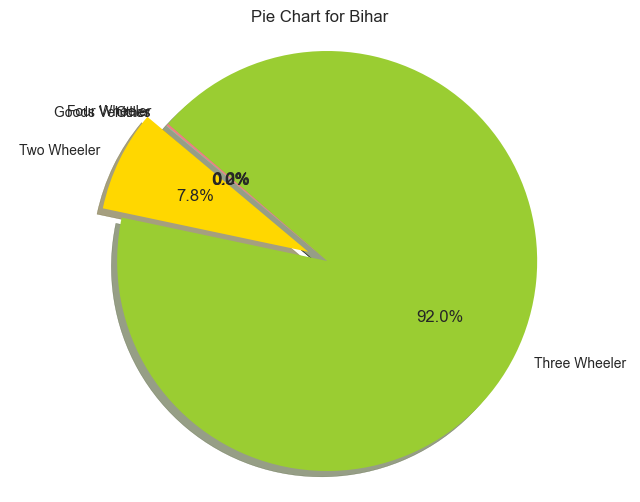

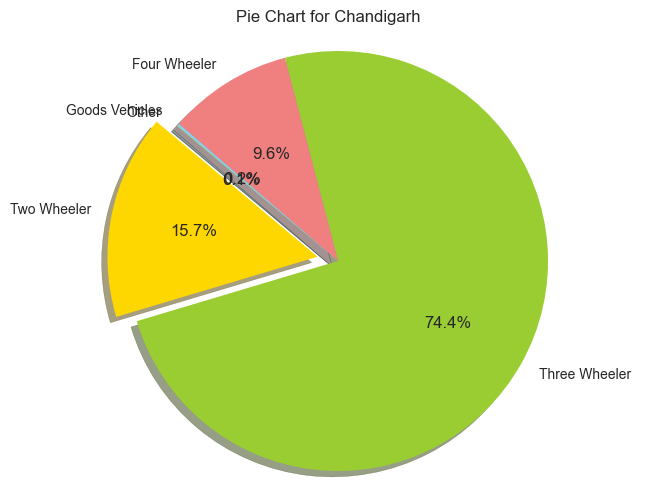

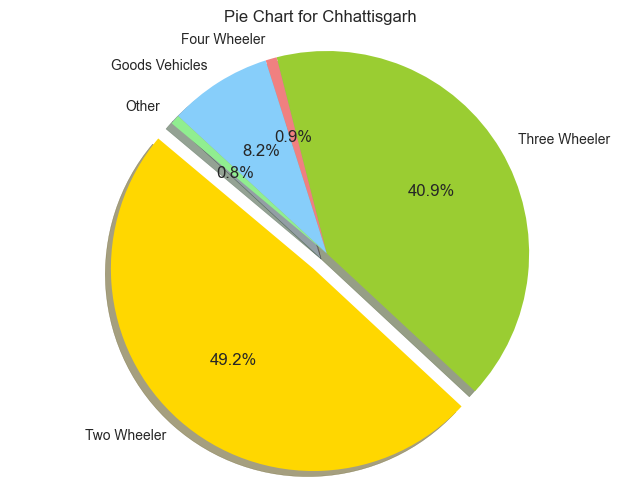

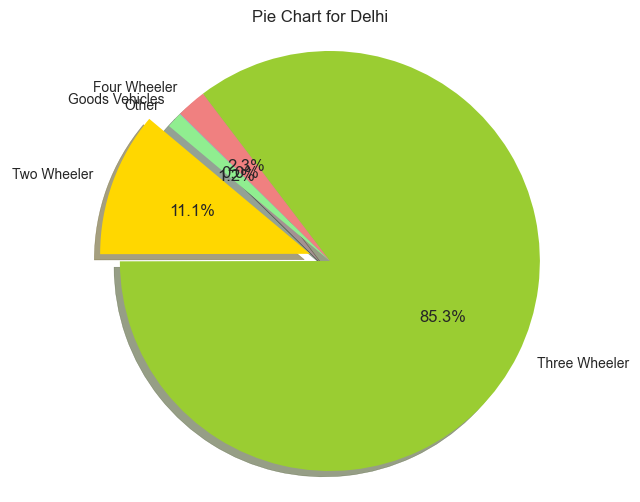

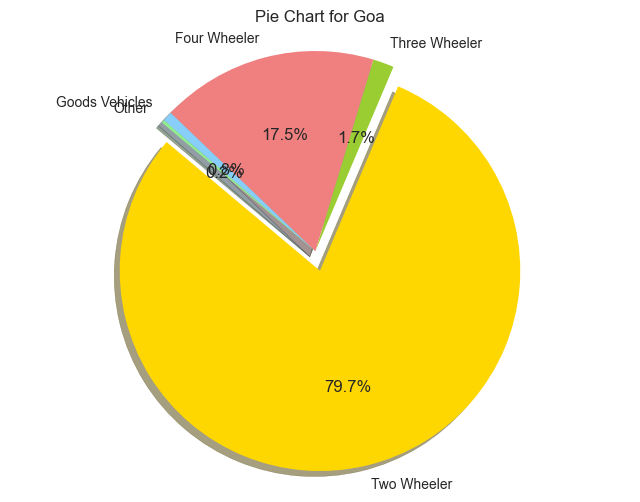

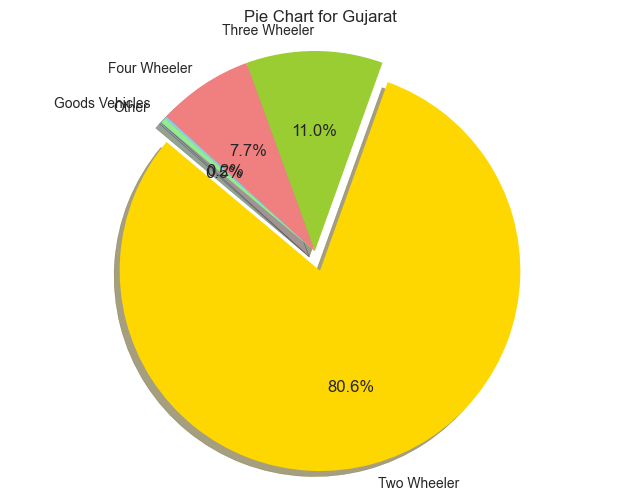

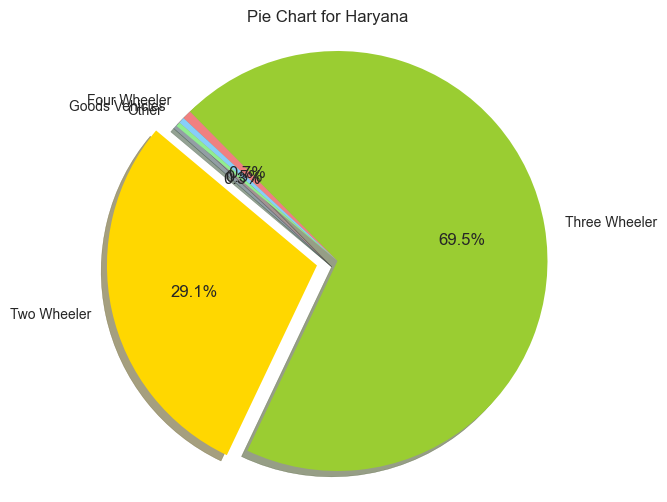

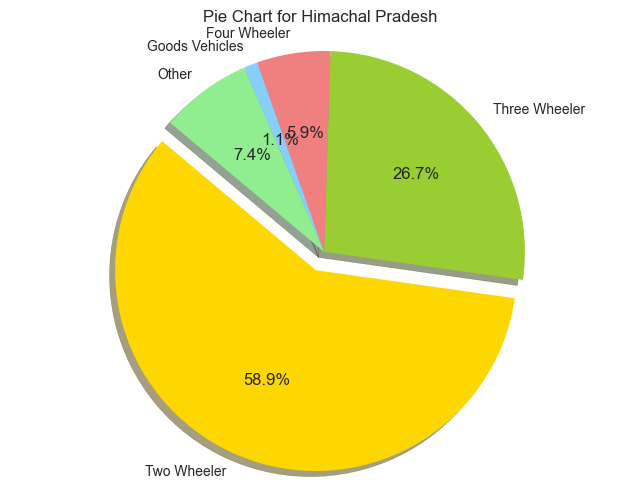

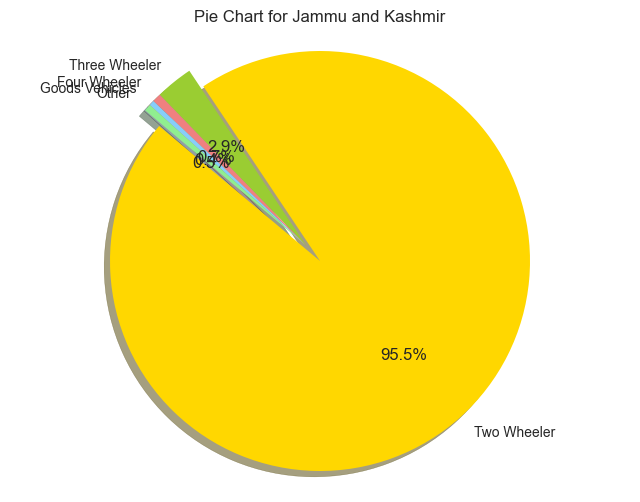

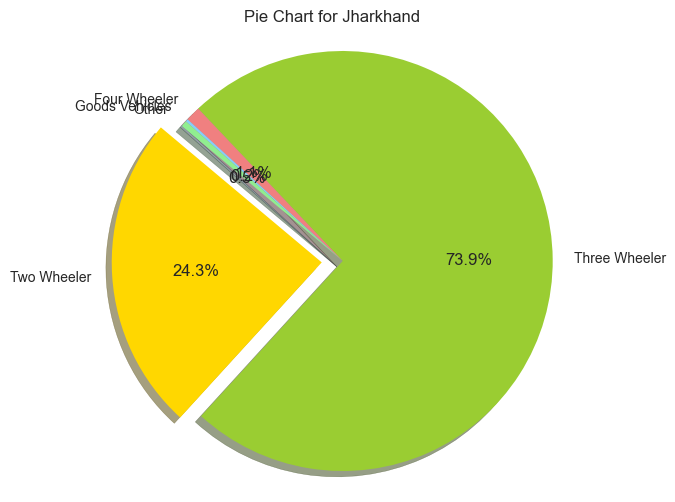

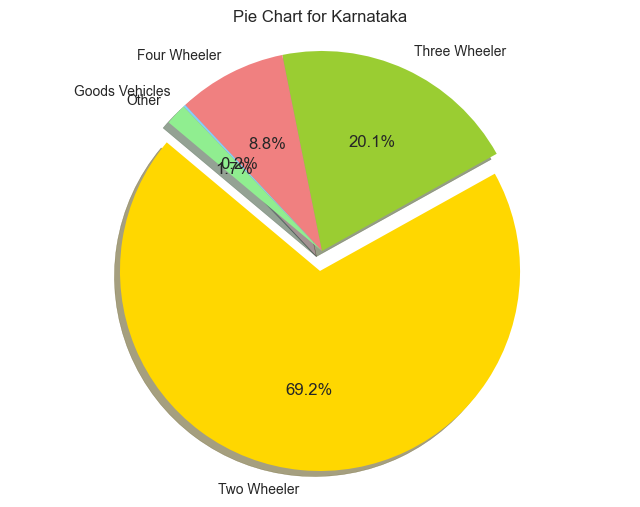

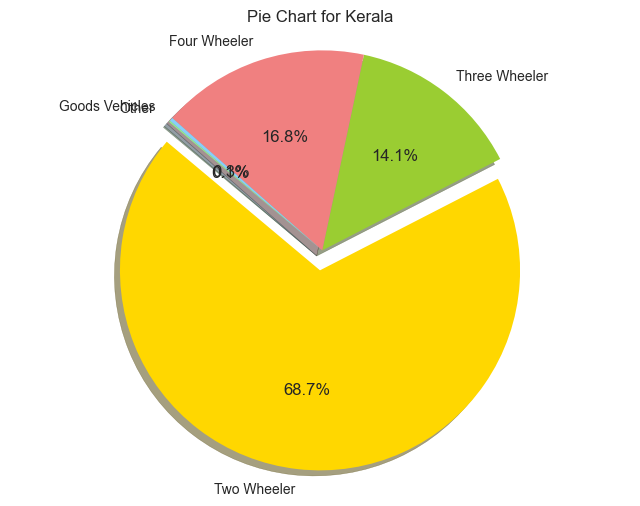

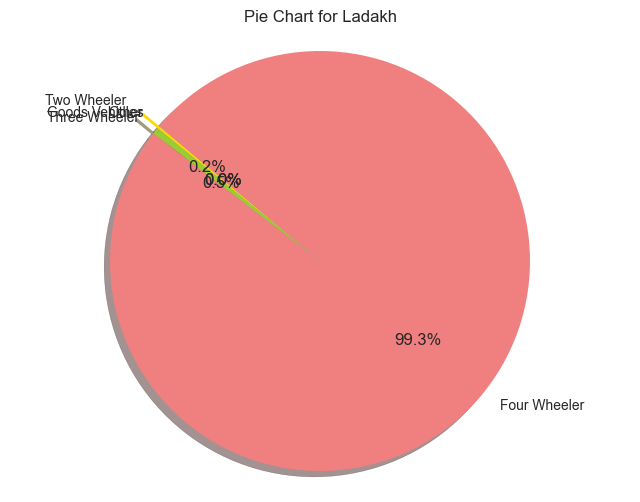

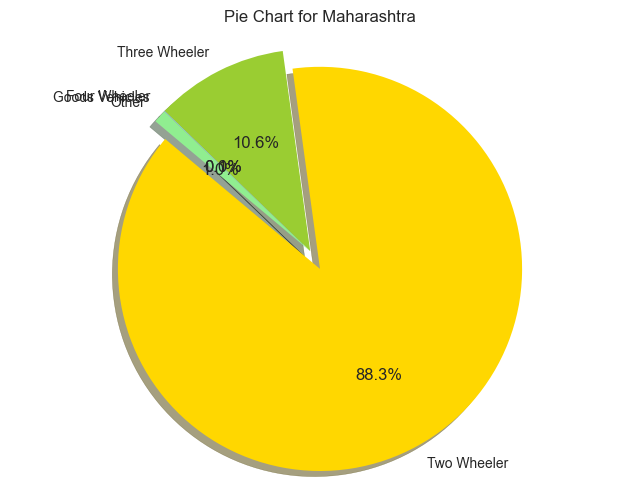

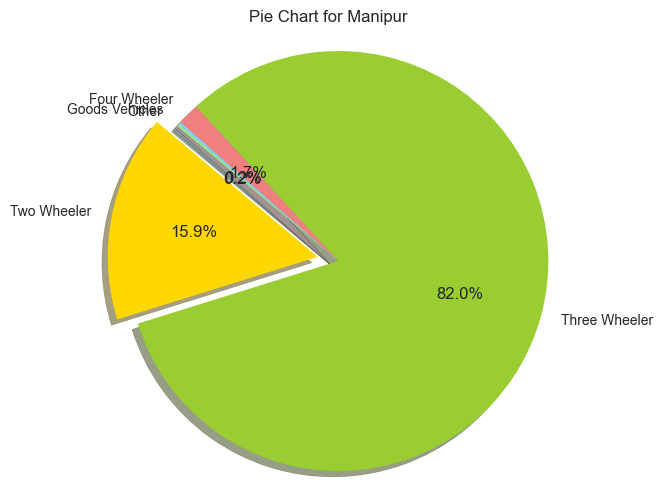

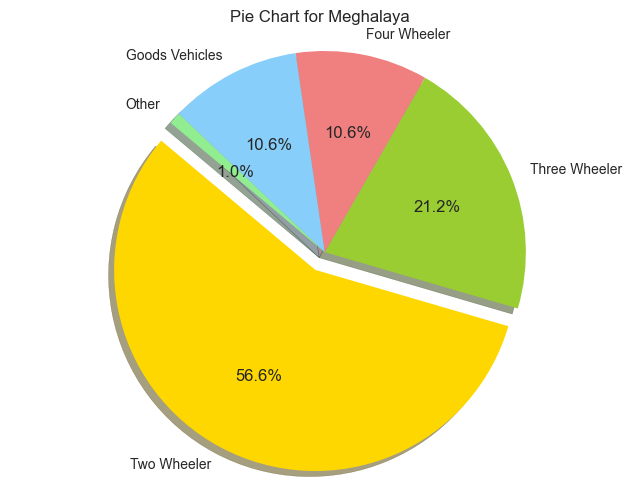

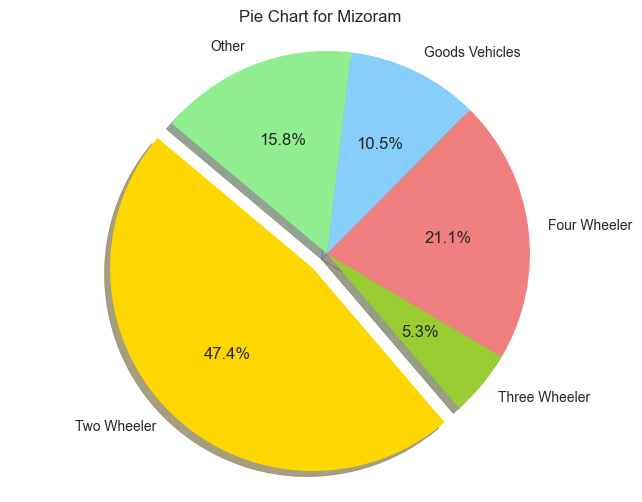

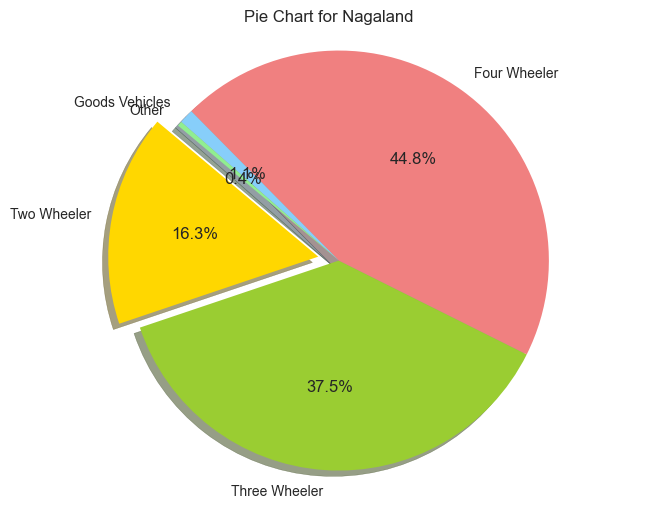

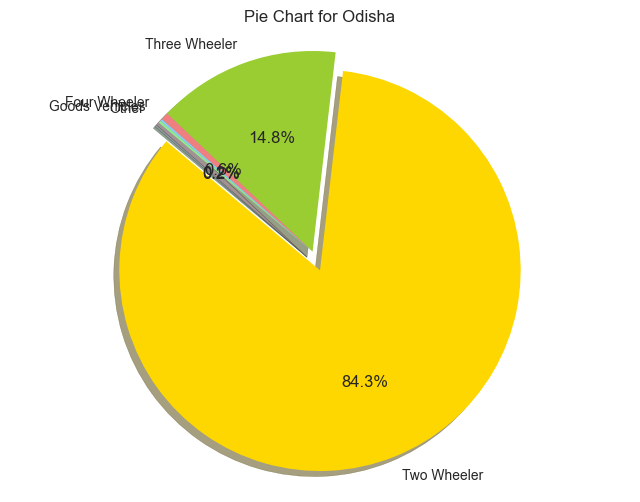

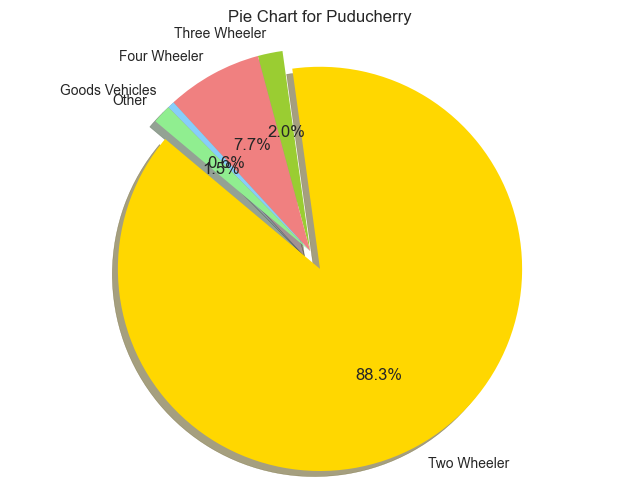

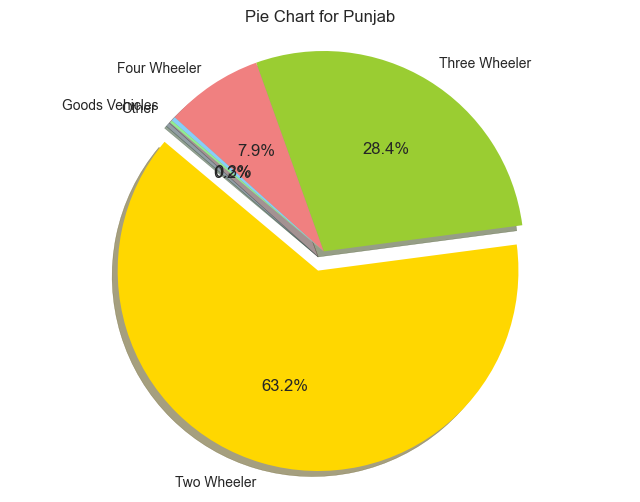

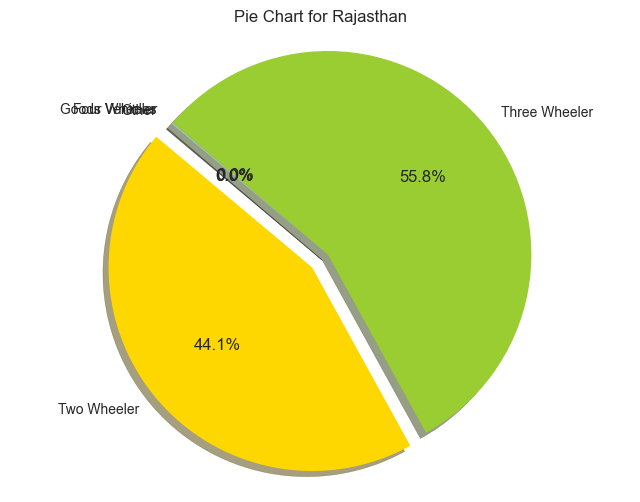

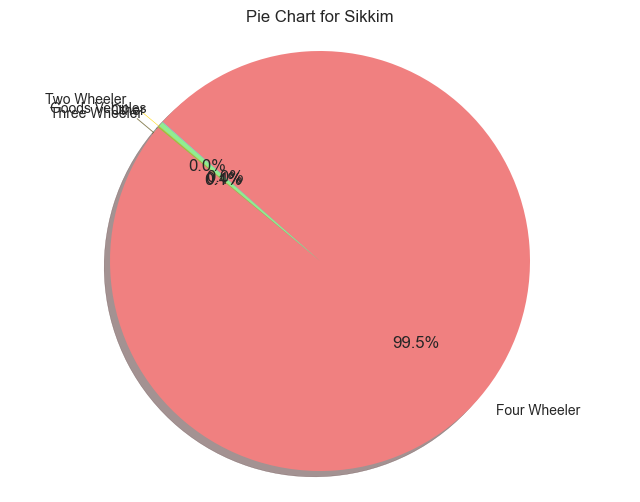

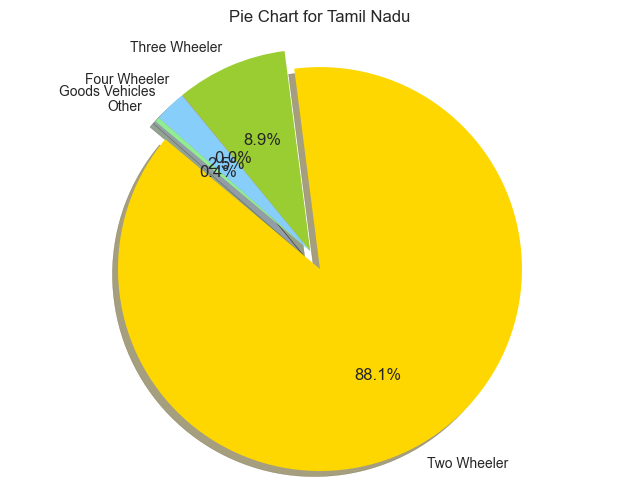

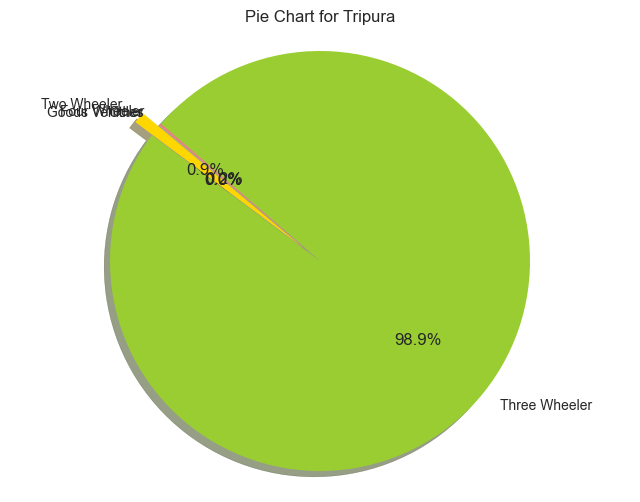

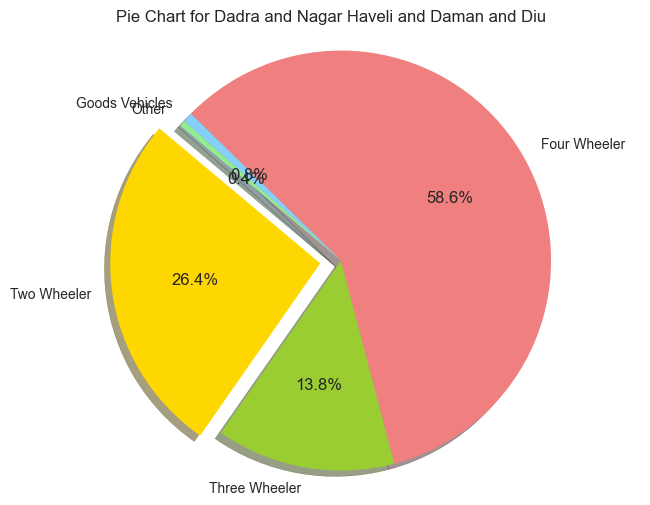

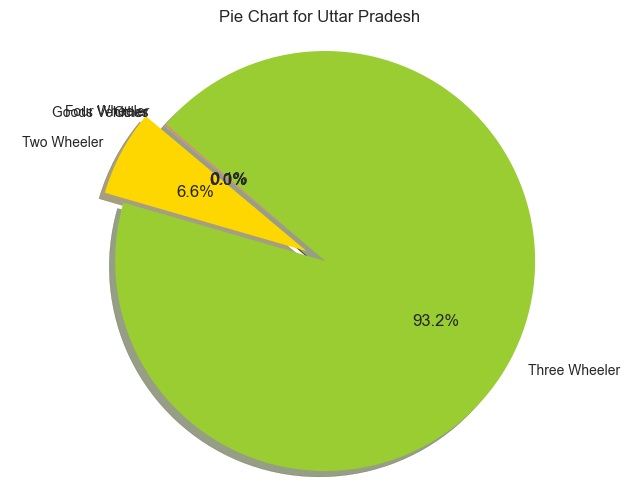

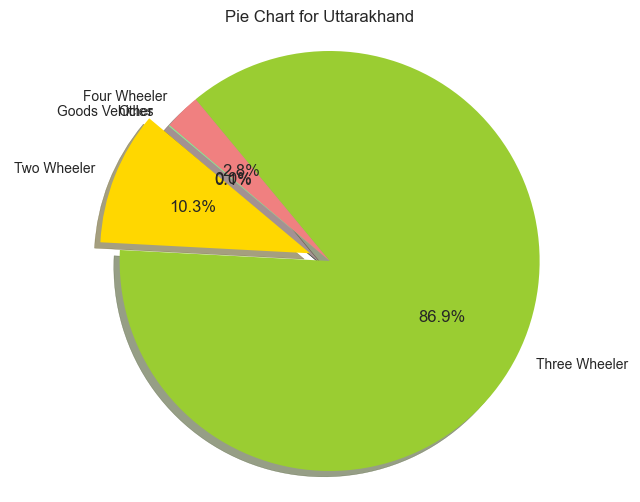

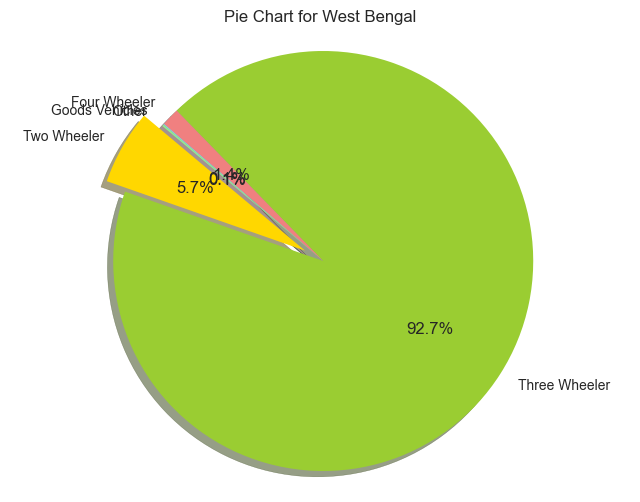

In [95]:
data = data.dropna(subset=['State Name'])

data.fillna(0, inplace=True)

states = data['State Name'].unique()

for state in states:
    state_data = data[data['State Name'] == state]
    
    labels = ['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Goods Vehicles', 'Other']
    sizes = state_data[['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Goods Vehicles', 'Other']].iloc[0]
    colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
    explode = (0.1, 0, 0, 0, 0)  
    
    plt.figure(figsize=(8, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')  
    plt.title(f'Pie Chart for {state}')
    plt.show()


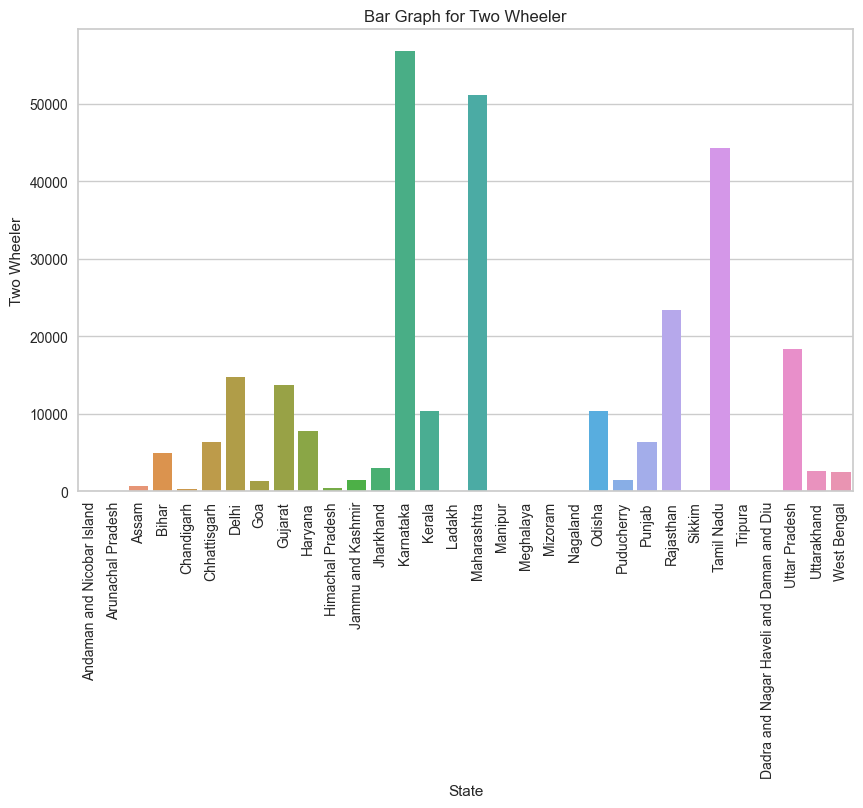

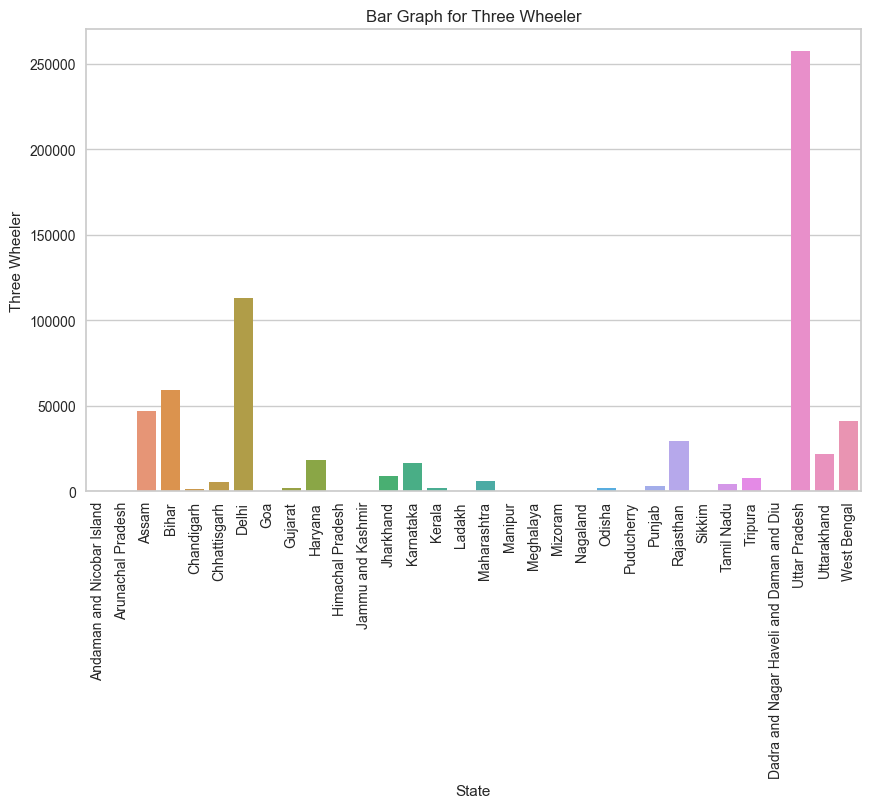

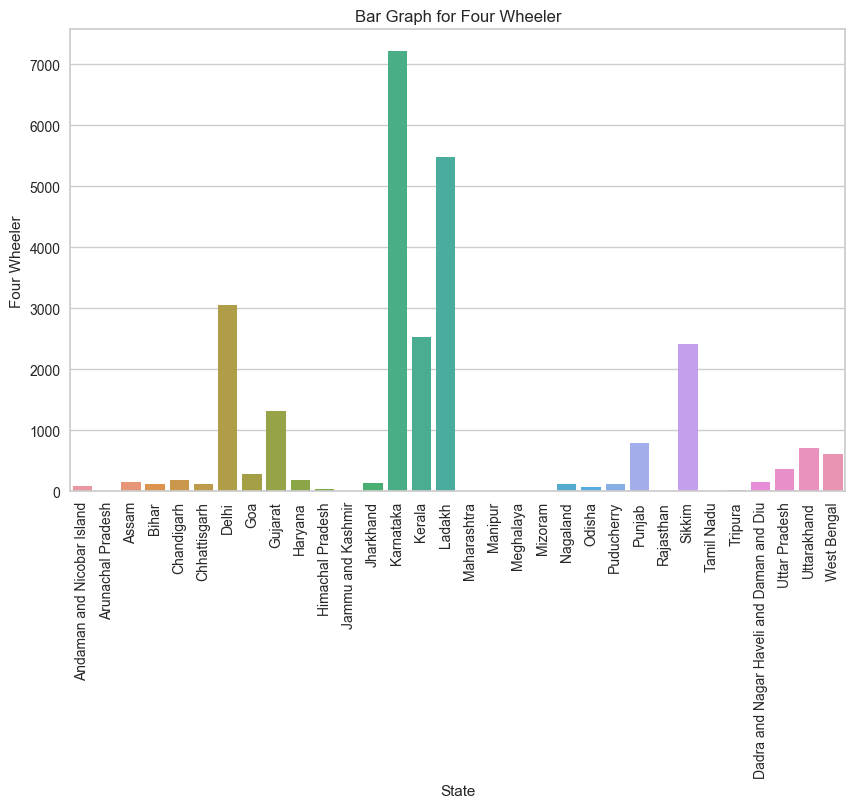

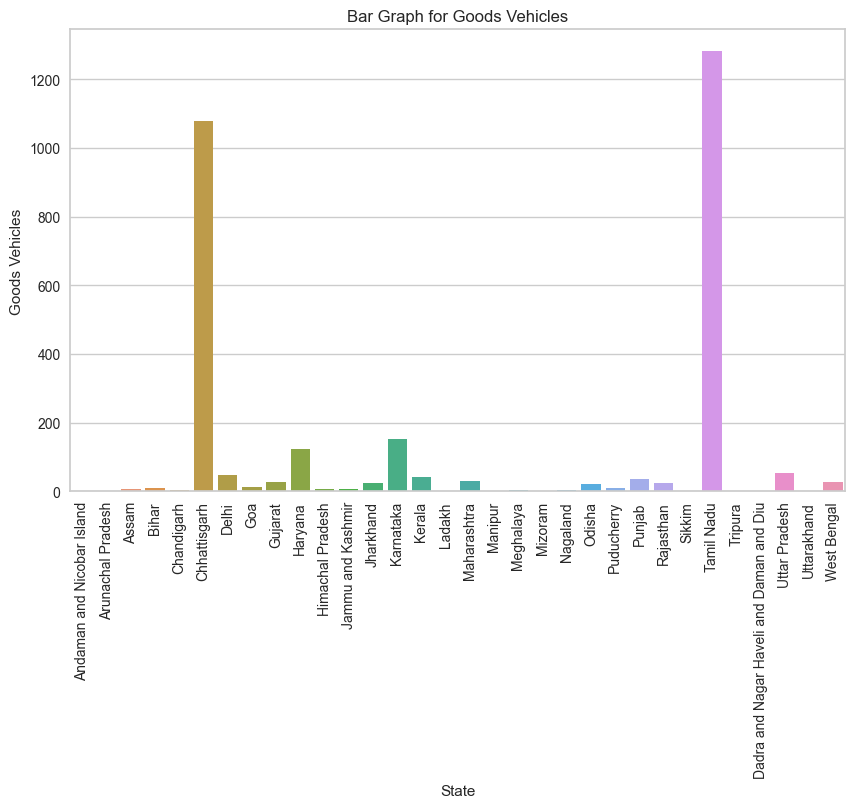

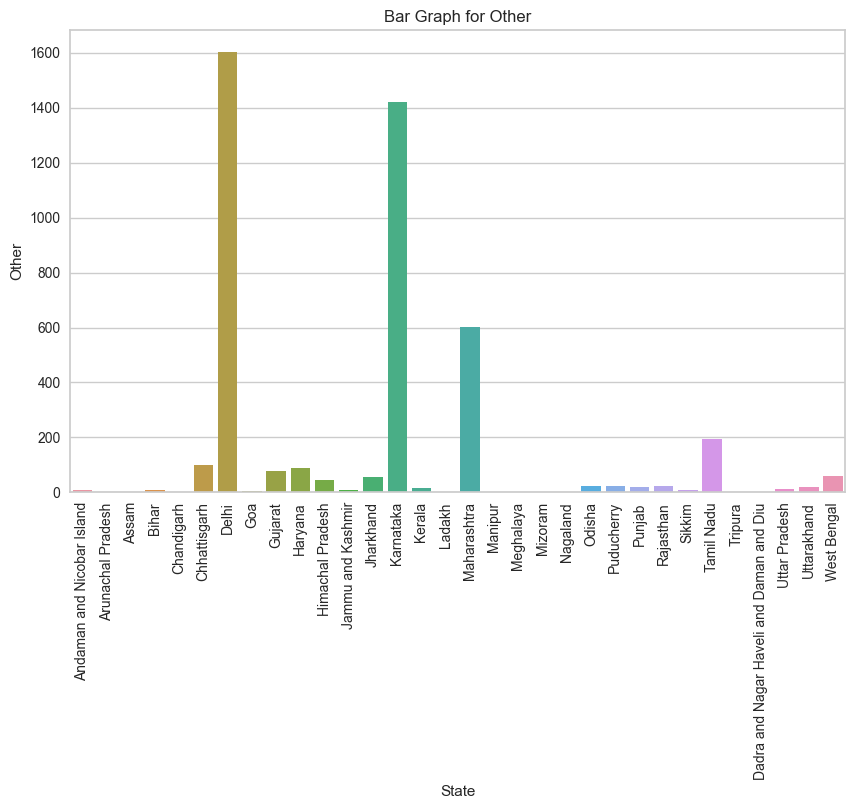

In [96]:
categories = ['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Goods Vehicles', 'Other']

for category in categories:
    # Set up the bar graph
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data, x='State Name', y=category, ci='sd')  # ci='sd' for showing median line (standard deviation)
    plt.xticks(rotation=90)
    plt.xlabel('State')
    plt.ylabel(f'{category}')
    plt.title(f'Bar Graph for {category}')
    plt.show()



# Using K- Cluster Algorithm for Dataset 2

In [97]:
X = data[['Two Wheeler', 'Four Wheeler', 'Three Wheeler', 'Goods Vehicles', 'Other']]

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)



C:\Users\ritik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


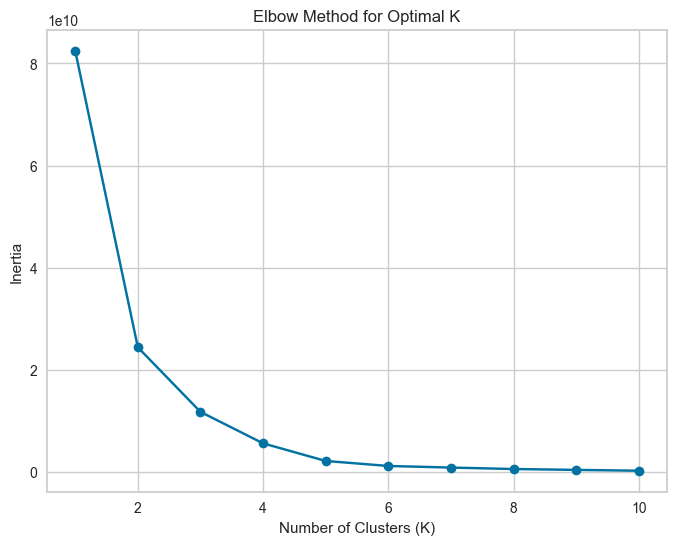

In [98]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()



In [99]:
k = 3 
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)




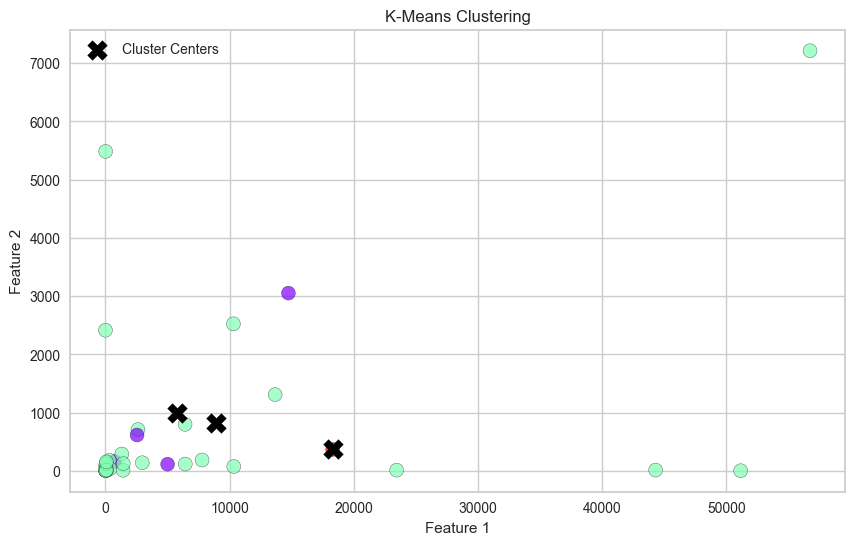

In [100]:
data['Cluster'] = pd.to_numeric(data['Cluster'])
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=data['Cluster'], cmap='rainbow', marker='o', edgecolors='k', s=100, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


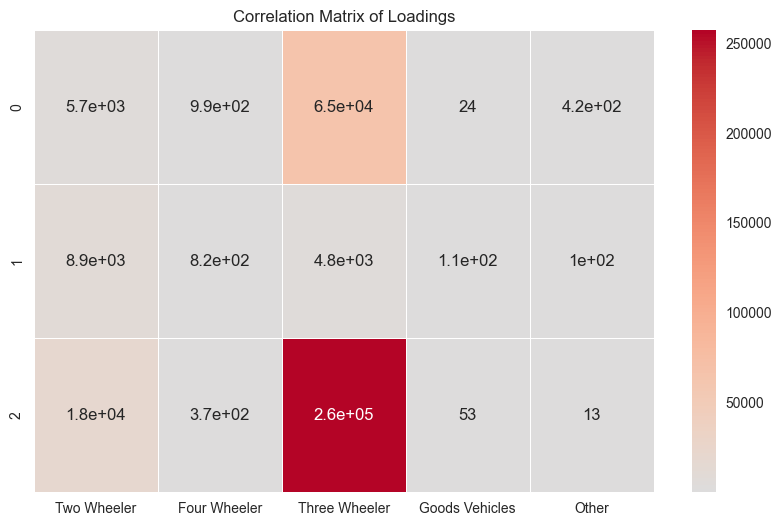

In [101]:
loadings = kmeans.cluster_centers_

correlation_matrix = pd.DataFrame(loadings, columns=X.columns)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix of Loadings')
plt.show()


In [102]:
cluster_0_states = data[data['Cluster'] == 0]['State Name']
cluster_1_states = data[data['Cluster'] == 1]['State Name']
cluster_2_states = data[data['Cluster'] == 2]['State Name']

# Print the states in each cluster
print("States in Cluster 0:", cluster_0_states)
print("States in Cluster 1:", cluster_1_states)
print("States in Cluster 2:", cluster_2_states)



States in Cluster 0: 2           Assam
3           Bihar
6           Delhi
31    West Bengal
Name: State Name, dtype: object
States in Cluster 1: 0                   Andaman and Nicobar Island
1                            Arunachal Pradesh
4                                   Chandigarh
5                                 Chhattisgarh
7                                          Goa
8                                      Gujarat
9                                      Haryana
10                            Himachal Pradesh
11                           Jammu and Kashmir
12                                   Jharkhand
13                                   Karnataka
14                                      Kerala
15                                      Ladakh
16                                 Maharashtra
17                                     Manipur
18                                   Meghalaya
19                                     Mizoram
20                                    Nagaland
21      

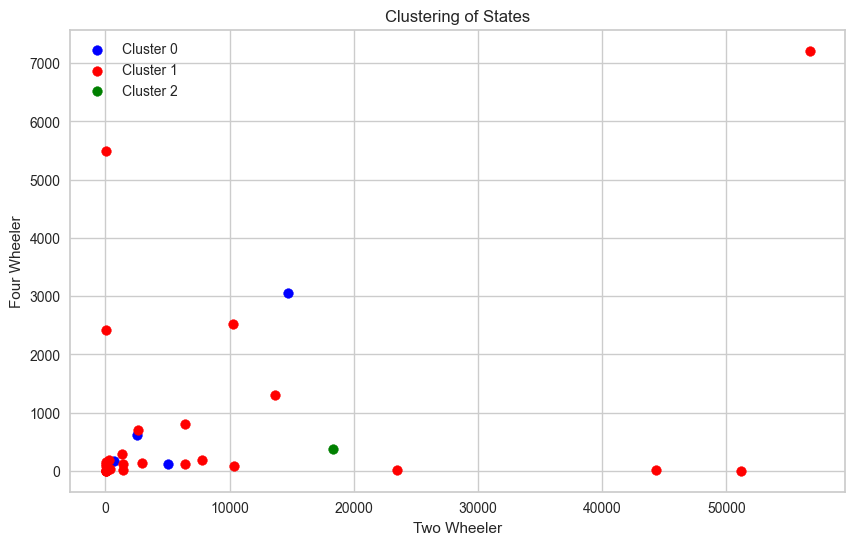

In [103]:
cluster_0_data = data[data['Cluster'] == 0]
cluster_1_data = data[data['Cluster'] == 1]
cluster_2_data = data[data['Cluster'] == 2]

plt.figure(figsize=(10, 6))
plt.scatter(cluster_0_data['Two Wheeler'], cluster_0_data['Four Wheeler'], c='blue', label='Cluster 0')
plt.scatter(cluster_1_data['Two Wheeler'], cluster_1_data['Four Wheeler'], c='red', label='Cluster 1')
plt.scatter(cluster_2_data['Two Wheeler'], cluster_2_data['Four Wheeler'], c='green', label='Cluster 2')

plt.xlabel('Two Wheeler')
plt.ylabel('Four Wheeler')
plt.title('Clustering of States')
plt.legend()
plt.show()



C:\Users\ritik\AppData\Local\Temp\ipykernel_14920\2239519299.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster_summary = data.groupby('Cluster')['Two Wheeler (%)', 'Three Wheeler (%)', 'Four Wheeler (%)', 'Goods Vehicles (%)', 'Other (%)'].agg(['mean', 'median']).reset_index()
C:\Users\ritik\AppData\Local\Temp\ipykernel_14920\2239519299.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


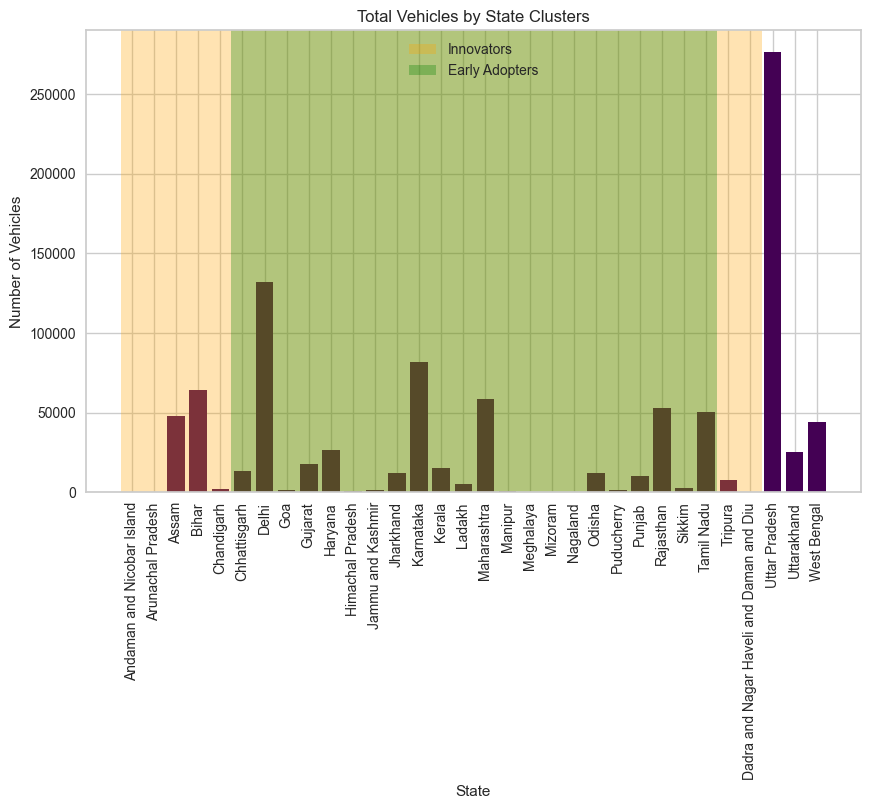

States with Innovators Characteristics:
['Andaman and Nicobar Island' 'Ladakh' 'Nagaland' 'Sikkim'
 'Dadra and Nagar Haveli and Daman and Diu']

States with Early Adopters Characteristics:
['Chhattisgarh' 'Goa' 'Gujarat' 'Himachal Pradesh' 'Jammu and Kashmir'
 'Karnataka' 'Kerala' 'Maharashtra' 'Meghalaya' 'Mizoram' 'Odisha'
 'Puducherry' 'Punjab' 'Tamil Nadu']


In [104]:
data['Two Wheeler (%)'] = (data['Two Wheeler'] / data['Grand Total']) * 100
data['Three Wheeler (%)'] = (data['Three Wheeler'] / data['Grand Total']) * 100
data['Four Wheeler (%)'] = (data['Four Wheeler'] / data['Grand Total']) * 100
data['Goods Vehicles (%)'] = (data['Goods Vehicles'] / data['Grand Total']) * 100
data['Other (%)'] = (data['Other'] / data['Grand Total']) * 100

X = data[['Two Wheeler (%)', 'Three Wheeler (%)', 'Four Wheeler (%)', 'Goods Vehicles (%)', 'Other (%)']]

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

cluster_summary = data.groupby('Cluster')['Two Wheeler (%)', 'Three Wheeler (%)', 'Four Wheeler (%)', 'Goods Vehicles (%)', 'Other (%)'].agg(['mean', 'median']).reset_index()
cluster_summary.columns = ['Cluster', 'Mean Two Wheeler', 'Mean Three Wheeler', 'Mean Four Wheeler', 'Mean Goods Vehicles', 'Mean Other', 
                           'Median Two Wheeler', 'Median Three Wheeler', 'Median Four Wheeler', 'Median Goods Vehicles', 'Median Other']

innovators_cluster = cluster_summary.loc[cluster_summary['Median Two Wheeler'] == cluster_summary['Median Two Wheeler'].max()]['Cluster'].values[0]
early_adopters_cluster = cluster_summary.loc[cluster_summary['Median Goods Vehicles'] == cluster_summary['Median Goods Vehicles'].max()]['Cluster'].values[0]

innovators_states = data.loc[data['Cluster'] == innovators_cluster, 'State Name']
early_adopters_states = data.loc[data['Cluster'] == early_adopters_cluster, 'State Name']

plt.figure(figsize=(10, 6))

cmap = plt.cm.get_cmap('viridis')
data['Color'] = data['Cluster'].apply(lambda x: cmap(x / (len(cmap.colors) - 1)))

plt.bar(data['State Name'], data['Grand Total'], color=data['Color'])

plt.xlabel('State')
plt.ylabel('Number of Vehicles')
plt.title('Total Vehicles by State Clusters')
plt.xticks(rotation=90)


plt.axvspan(innovators_states.index[0] - 0.5, innovators_states.index[-1] + 0.5, facecolor='orange', alpha=0.3, label='Innovators')
plt.axvspan(early_adopters_states.index[0] - 0.5, early_adopters_states.index[-1] + 0.5, facecolor='green', alpha=0.3, label='Early Adopters')

plt.legend()
plt.show()


print("States with Innovators Characteristics:")
print(innovators_states.values)

print("\nStates with Early Adopters Characteristics:")
print(early_adopters_states.values)

# K Cluster Algorithm on Dataset 1


In [33]:
entries_by_region.info()


<class 'pandas.core.series.Series'>
Index: 60 entries, Maharashtra to Andaman
Series name: state
Non-Null Count  Dtype
--------------  -----
60 non-null     int64
dtypes: int64(1)
memory usage: 960.0+ bytes


In [34]:
dataset = dataset.dropna(subset=['lattitude'])


In [35]:
charging_station_counts = dataset['state'].value_counts()


In [36]:
charging_station_data = pd.DataFrame({'State': charging_station_counts.index, 'Station Count': charging_station_counts.values})


In [37]:
charging_station_data


,State,Station Count
0,Maharashtra,253
1,Tamil Nadu,155
2,Karnataka,133
3,Delhi,125
4,Kerala,90
5,Uttar Pradesh,86
6,Telangana,75
7,Gujarat,75
8,Rajasthan,67
9,Haryana,59


In [38]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(charging_station_data[['Station Count']])
    inertia.append(kmeans.inertia_)


C:\Users\ritik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


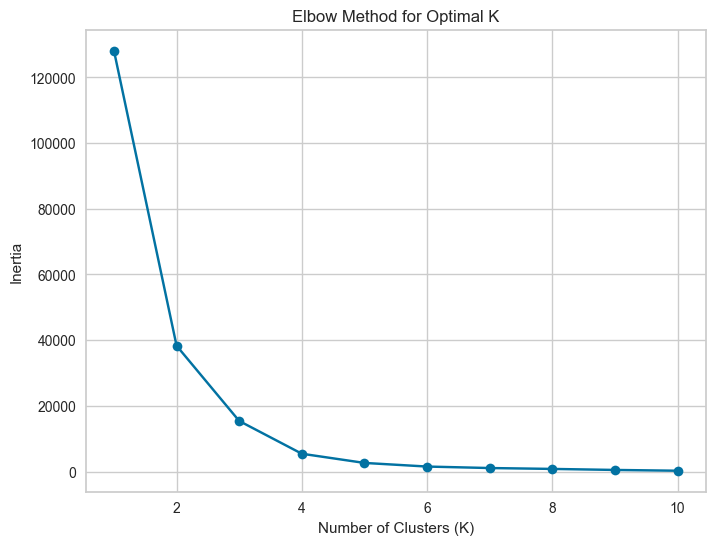

In [39]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [40]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
charging_station_data['Cluster'] = kmeans.fit_predict(charging_station_data[['Station Count']])



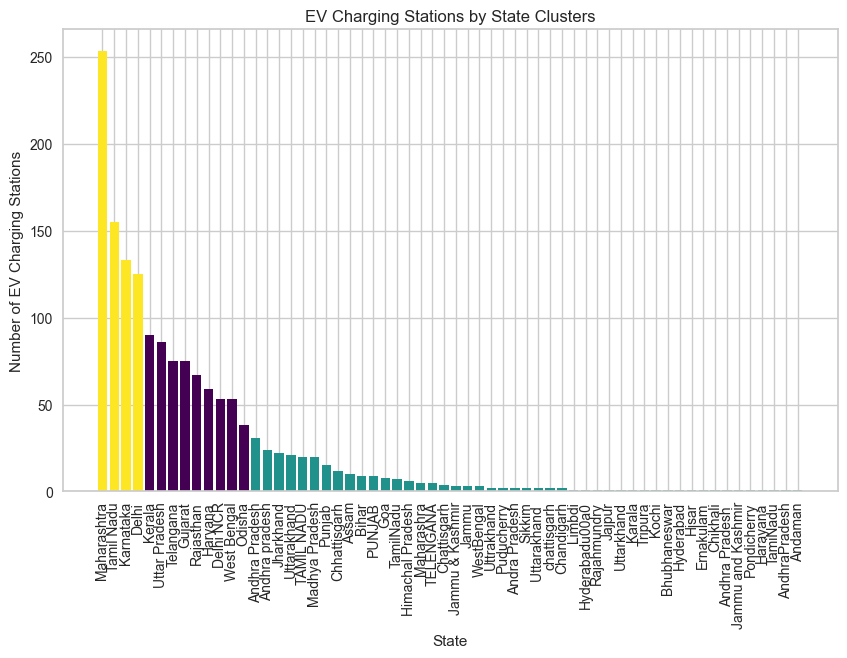

In [41]:
colors = plt.cm.viridis(np.linspace(0, 1, k))
plt.figure(figsize=(10, 6))
plt.bar(charging_station_data['State'], charging_station_data['Station Count'], color=colors[charging_station_data['Cluster']])
plt.xlabel('State')
plt.ylabel('Number of EV Charging Stations')
plt.title('EV Charging Stations by State Clusters')
plt.xticks(rotation=90)
plt.show()


C:\Users\ritik\AppData\Local\Temp\ipykernel_14920\3275307352.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


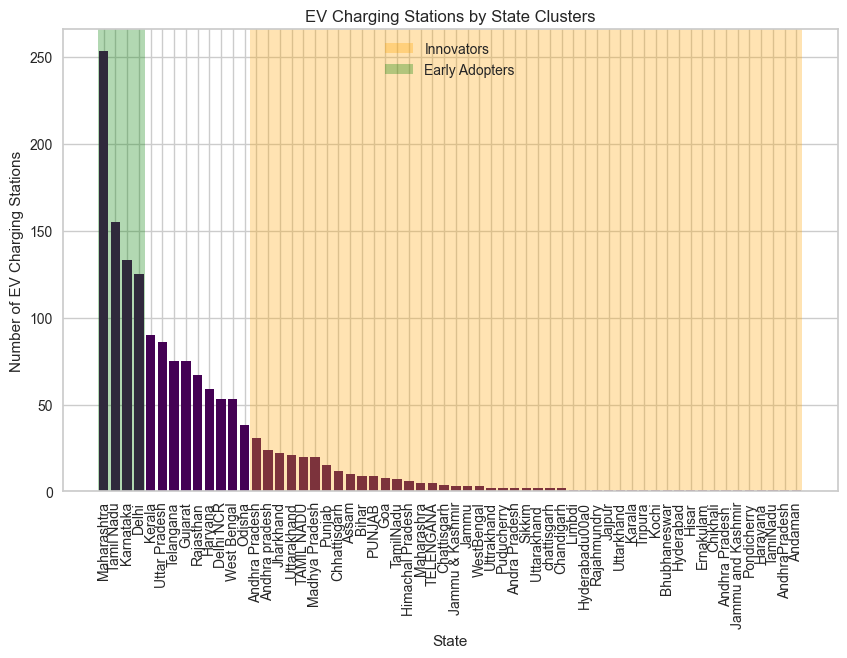

States with Innovators Characteristics:
['Andhra Pradesh' 'Andhra pradesh' 'Jharkhand' 'Uttarakhand' 'TAMIL NADU'
 'Madhya Pradesh' 'Punjab' 'Chhattisgarh' 'Assam' 'Bihar' 'PUNJAB' 'Goa'
 'TamilNadu' 'Himachal Pradesh' 'Maharashra' 'TELENGANA' 'Chattisgarh'
 'Jammu & Kashmir' 'Jammu' 'WestBengal' 'Uttrakhand' 'Puducherry'
 'Andra Pradesh' 'Sikkim' 'Uttarakhand ' 'chattisgarh' 'Chandigarh'
 'Limbdi' 'Hyderabadu00a0' 'Rajahmundry' 'Jajpur' 'Uttarkhand' 'Karala'
 'Tripura' 'Kochi' 'Bhubhaneswar' 'Hyderabad' 'Hisar' 'Ernakulam'
 'Chikhali' 'Andhra Pradesh ' 'Jammu and Kashmir' 'Pondicherry' 'Harayana'
 'TamiNadu' 'AndhraPradesh' 'Andaman']

States with Early Adopters Characteristics:
['Maharashtra' 'Tamil Nadu' 'Karnataka' 'Delhi']


In [42]:
charging_station_counts = dataset['state'].value_counts().reset_index()
charging_station_counts.columns = ['State', 'Station Count']

X = charging_station_counts[['Station Count']]
kmeans = KMeans(n_clusters=3, random_state=42)
charging_station_counts['Cluster'] = kmeans.fit_predict(X)

cluster_summary = charging_station_counts.groupby('Cluster')['Station Count'].agg(['mean', 'median']).reset_index()
cluster_summary.columns = ['Cluster', 'Mean Stations', 'Median Stations']

innovators_cluster = cluster_summary.loc[cluster_summary['Median Stations'] == cluster_summary['Median Stations'].min()]['Cluster'].values[0]
early_adopters_cluster = cluster_summary.loc[cluster_summary['Median Stations'] == cluster_summary['Median Stations'].max()]['Cluster'].values[0]

innovators_states = charging_station_counts.loc[charging_station_counts['Cluster'] == innovators_cluster, 'State']
early_adopters_states = charging_station_counts.loc[charging_station_counts['Cluster'] == early_adopters_cluster, 'State']

plt.figure(figsize=(10, 6))

cmap = plt.cm.get_cmap('viridis')
charging_station_counts['Color'] = charging_station_counts['Cluster'].apply(lambda x: cmap(x / (len(cmap.colors) - 1)))

plt.bar(charging_station_counts['State'], charging_station_counts['Station Count'], color=charging_station_counts['Color'])

plt.xlabel('State')
plt.ylabel('Number of EV Charging Stations')
plt.title('EV Charging Stations by State Clusters')
plt.xticks(rotation=90)
plt.axvspan(innovators_states.index[0] - 0.5, innovators_states.index[-1] + 0.5, facecolor='orange', alpha=0.3, label='Innovators')
plt.axvspan(early_adopters_states.index[0] - 0.5, early_adopters_states.index[-1] + 0.5, facecolor='green', alpha=0.3, label='Early Adopters')

plt.legend()
plt.show()

print("States with Innovators Characteristics:")
print(innovators_states.values)

print("\nStates with Early Adopters Characteristics:")
print(early_adopters_states.values)
